In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("capmetro_UT.csv")

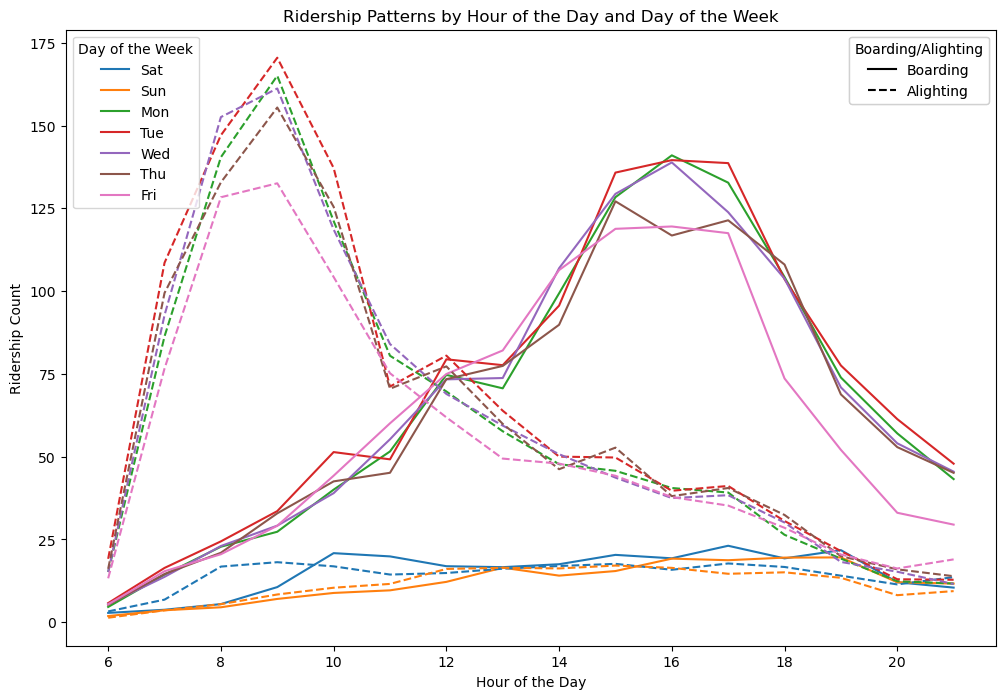

In [3]:
# Figure 1: Ridership Patterns by Hour of the Day and Day of the Week
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='hour_of_day', y='boarding', hue='day_of_week', err_style=None, linestyle='-')
sns.lineplot(data=df, x='hour_of_day', y='alighting', hue='day_of_week', err_style=None, linestyle='--')
plt.xlabel("Hour of the Day")
plt.ylabel("Ridership Count")
plt.title("Ridership Patterns by Hour of the Day and Day of the Week")

# Custom Legend 1 for day_of_week
days_of_week = df['day_of_week'].unique()
legend1 = plt.legend(title='Day of the Week', loc='upper left', labels=days_of_week)

# Custom Legend 2 for boarding and alighting
custom_legend = [plt.Line2D([0], [0], color='black', linestyle='-'),
                 plt.Line2D([0], [0], color='black', linestyle='--')]
legend_labels = ['Boarding', 'Alighting']
legend2 = plt.legend(custom_legend, legend_labels, title='Boarding/Alighting', loc='upper right')

# Add the custom legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.show()


The number of people getting on and off the buses (boarding and alighting) is comparatively lower on weekends, specifically on Saturday and Sunday. This suggests that there is reduced bus activity and ridership during the weekends compared to weekdays.

By observing the plot, we can infer that the highest number of people getting off the buses (alighting) occurs between 7-9 am on weekdays. This likely indicates the morning rush hour when people are commuting to school.

The plot reveals that the boarding count reaches its peak at around 3-6 pm. This corresponds to the period when classes are likely ending, and students are returning home, leading to increased bus usage during those late afternoon hours.

NameError: name 'Line2D' is not defined

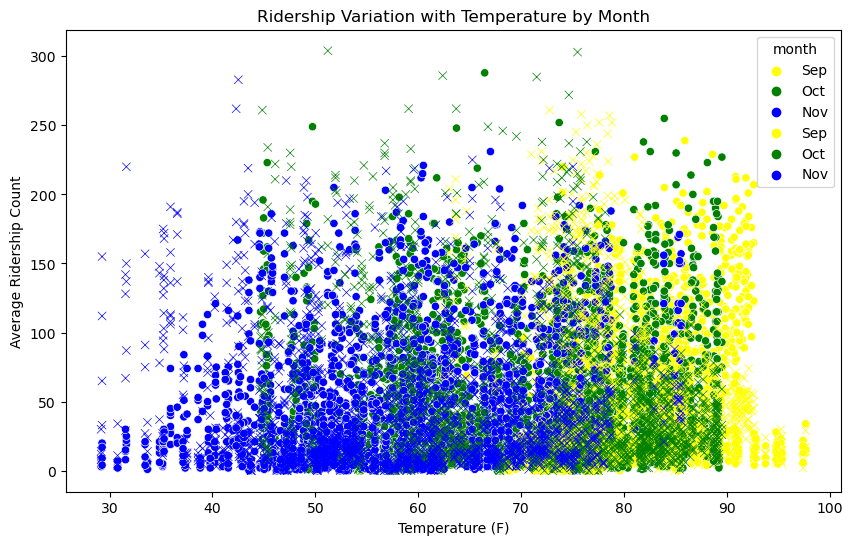

In [7]:
# Figure 2: Ridership Variation with Temperature by Month
plt.figure(figsize=(10, 6))

month_palette = {
    'Sep': 'yellow',
    'Oct': 'green',
    'Nov': 'blue',
}
sns.scatterplot(data=df, x='temperature', y='boarding', hue='month', palette=month_palette, marker='o')
sns.scatterplot(data=df, x='temperature', y='alighting', hue='month', palette=month_palette, marker='x')
plt.xlabel("Temperature (F)")
plt.ylabel("Average Ridership Count")
plt.title("Ridership Variation with Temperature by Month")

months = df['month'].unique()
legend1_elements = [Line2D([0], [0], color=month_palette[month], linestyle='-', markersize=8) for month in months]
legend1 = plt.legend(legend1_elements, months, title='Month', loc='upper left')

# Custom Legend 2 for boarding and alighting
custom_legend = [plt.Line2D([], [], marker='o', linestyle='None', color='black'),
                 plt.Line2D([], [], marker='x', linestyle='None', color='black')]
legend_labels = ['Boarding', 'Alighting']
legend2 = plt.legend(custom_legend, legend_labels, title='Boarding/Alighting', loc='upper right')

plt.gca().add_artist(legend1)
plt.show()

The data indicates that the number of people boarding and alighting buses is at its lowest during the temperature extremes of September (ranging from 90-100 degrees Fahrenheit) and November (ranging from 30-40 degrees Fahrenheit). During these months, the weather conditions might discourage people from using public transportation, resulting in reduced bus ridership.

The plot likely shows a correlation between extreme temperatures and decreased bus ridership. During hot summer months (September) when temperatures soar, people might prefer other modes of transportation to avoid discomfort. Similarly, in cold months (November) when temperatures drop significantly, people might opt for warmer transport options, such as cars or indoor facilities, reducing bus usage.

The data highlights that the most significant bus ridership occurs when temperatures fall within a moderate range of 50-80 degrees Fahrenheit. During these temperature intervals, people seem to prefer using buses as their primary means of transportation.

Moderate temperatures, neither too hot nor too cold, provide comfortable conditions for bus travel. The convenience and comfort offered by buses during these weather conditions might attract more passengers, leading to higher ridership in the 50-80 degrees Fahrenheit range. As the temperature is more pleasant during these periods, people may choose public transportation for their daily commute or travel needs.

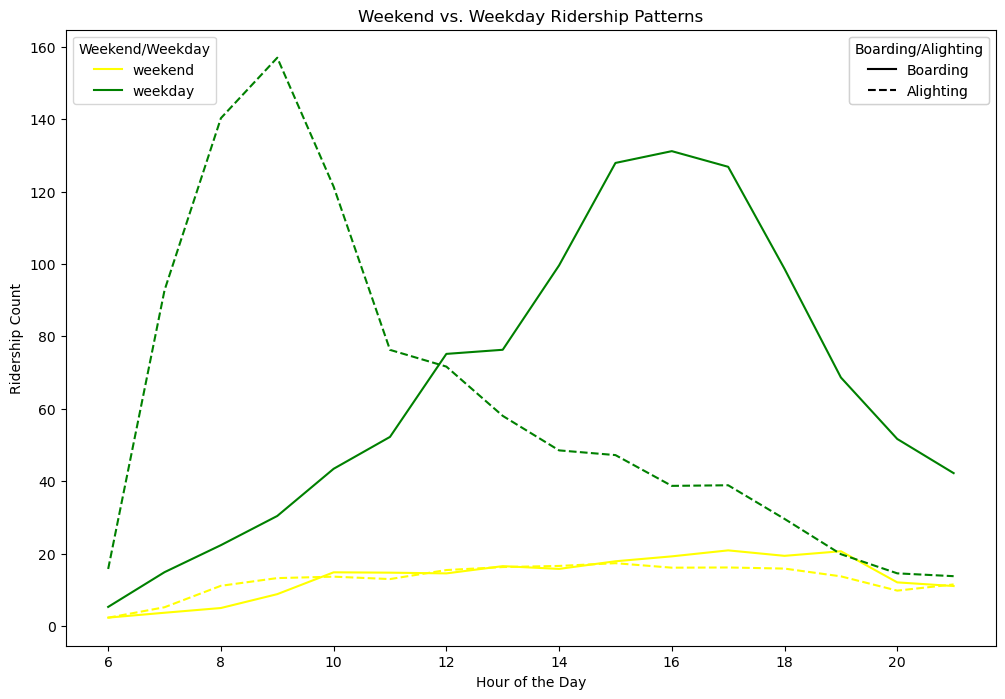

In [5]:
# Figure 3: Weekend vs. Weekday Ridership Patterns
plt.figure(figsize=(12, 8))

wpalette = {
    'weekend': 'yellow',
    'weekday': 'green',
}
sns.lineplot(data=df, x='hour_of_day', y='boarding', hue='weekend', err_style=None, linestyle='-', palette=wpalette)
sns.lineplot(data=df, x='hour_of_day', y='alighting', hue='weekend', err_style=None, linestyle='--', palette=wpalette)
plt.xlabel("Hour of the Day")
plt.ylabel("Ridership Count")
plt.title("Weekend vs. Weekday Ridership Patterns")

weekend = df['weekend'].unique()
legend1 = plt.legend(title='Weekend/Weekday', loc='upper left', labels=weekend)

custom_legend = [plt.Line2D([0], [0], color='black', linestyle='-'),
                 plt.Line2D([0], [0], color='black', linestyle='--')]
legend_labels = ['Boarding', 'Alighting']
legend2 = plt.legend(custom_legend, legend_labels, title='Boarding/Alighting', loc='upper right')

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.show()

The data suggests that there is a higher frequency of travel or commuting on weekdays compared to weekends. This indicates that people tend to be more active in terms of transportation and travel during the working or business days of the week (Monday to Friday) as opposed to the weekends (Saturday and Sunday).

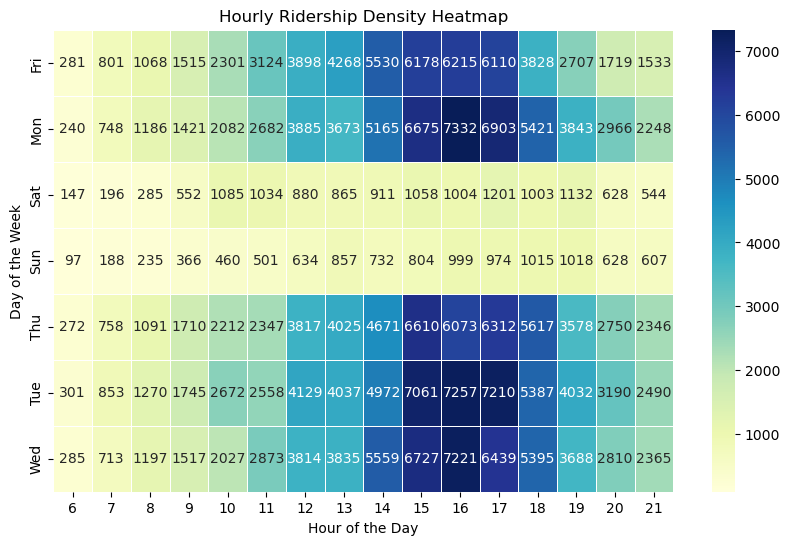

In [6]:
# Figure 4: Hourly Ridership Density Heatmap

hourly_ridership = df.pivot_table(index='day_of_week', columns='hour_of_day', values='boarding', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_ridership, cmap='YlGnBu', annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Hourly Ridership Density Heatmap")
plt.show()

The heatmap clearly shows the highest boarding activity at 4 pm on Mondays, indicating a rush hour or busy period when people are likely leaving work or educational institutions and relying on buses to commute home. The high boarding count at this time suggests that buses are heavily utilized to accommodate the transportation needs of a large number of individuals.

The heatmap shows the least boarding activity on Sunday at 6 am, which is expected during the early hours of a weekend day. At this time, many people may still be at home or resting, resulting in a reduced need for public transportation services. As a result, the boarding count is notably lower compared to other hours and days, highlighting the quieter period during Sunday mornings in terms of bus usage.